In [ ]:
#!pip install imblearn

In [2]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas_profiling
from pandas_profiling import ProfileReport




Bad key "text.kerning_factor" on line 4 in
C:\Users\NXA15021\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#Loading the dataset
dataset_df = pd.read_csv("./Data/Binarias/trasplantes.csv",encoding = "ISO-8859-1", engine='python')


In [4]:
dataset_df=dataset_df.dropna()
print (dataset_df.shape)
print (list(dataset_df.columns))

(76701, 56)
['Unnamed: 0', 'MAS DE UN ANIO', 'CUATRO A ONCE MESES', 'UNO A TRES MESES', 'MENOS DE UN MES', 'MISMO DIA', 'MASCULINO', 'FEMENINO', 'SNTE', 'SEMAR', 'PEMEX', 'SEDENA', 'ISSSTE', 'SSA', 'SSE', 'IMSS', 'PRIVADO', 'INSTITUCION_ORGANO', 'CENTRO', 'SURESTE', 'NORESTE', 'NOROESTE', 'OCCIDENTE', 'GSR_A2B', 'GSR_A1B', 'GSR_A2', 'GSR_A1', 'GSR_AB', 'GSR_B', 'GSR_A', 'GSR_NO DISPONIBLE', 'GSR_NO APLICA', 'GSR_O', 'RH_NEGATIVO', 'RH_NO DISPONIBLE', 'RH_NO APLICA', 'RH_POSITIVO', 'MAS DE 61 ANIOS', 'DE 45 A 61 ANIOS', 'DE 31 A 44 ANIOS', 'DE 23 A 30 ANIOS', 'MENOS DE 23 ANIOS', 'ANIO TRASPLANTE', 'CORNEA', 'RINON', 'TRASPLANTE_CORNEA IMPORTADA', 'TRASPLANTE_VIVO', 'TRASPLANTE_CADAVER', 'RELACION_SE DESCONOCE', 'RELACION_NO RELACIONADO', 'RELACION_PARENTESCO/RELACIONADO', 'RELACION_NO APLICA', 'NO DISPONIBLE', 'EXITOSO', 'NO APLICA', 'NO EXITOSO']


In [5]:
dataset_df.head()

,Unnamed: 0,MAS DE UN ANIO,CUATRO A ONCE MESES,UNO A TRES MESES,MENOS DE UN MES,MISMO DIA,MASCULINO,FEMENINO,SNTE,SEMAR,...,TRASPLANTE_VIVO,TRASPLANTE_CADAVER,RELACION_SE DESCONOCE,RELACION_NO RELACIONADO,RELACION_PARENTESCO/RELACIONADO,RELACION_NO APLICA,NO DISPONIBLE,EXITOSO,NO APLICA,NO EXITOSO
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
2,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,3,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,4,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [8]:
# Information about the data
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76701 entries, 0 to 76700
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Unnamed: 0                       76701 non-null  int64
 1   MAS DE UN ANIO                   76701 non-null  int64
 2   CUATRO A ONCE MESES              76701 non-null  int64
 3   UNO A TRES MESES                 76701 non-null  int64
 4   MENOS DE UN MES                  76701 non-null  int64
 5   MISMO DIA                        76701 non-null  int64
 6   MASCULINO                        76701 non-null  int64
 7   FEMENINO                         76701 non-null  int64
 8   SNTE                             76701 non-null  int64
 9   SEMAR                            76701 non-null  int64
 10  PEMEX                            76701 non-null  int64
 11  SEDENA                           76701 non-null  int64
 12  ISSSTE                           76701 non-nul

In [9]:
dataset_df['NO EXITOSO'].value_counts()

0    76295
1      406
Name: NO EXITOSO, dtype: int64

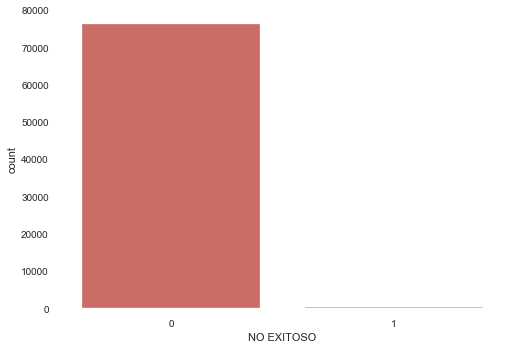

<Figure size 576x396 with 0 Axes>

In [10]:
sn.countplot(x='NO EXITOSO', data=dataset_df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
count_no_sub = len(dataset_df[dataset_df['NO EXITOSO']==0])
count_sub = len(dataset_df[dataset_df['NO EXITOSO']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of NO EXITOSO=0 is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of NO EXITOSO =1", pct_of_sub*100)


percentage of NO EXITOSO=0 is 99.47067182957198
percentage of NO EXITOSO =1 0.5293281704280257


In [12]:
dataset_df.groupby('NO EXITOSO').mean()

,Unnamed: 0,MAS DE UN ANIO,CUATRO A ONCE MESES,UNO A TRES MESES,MENOS DE UN MES,MISMO DIA,MASCULINO,FEMENINO,SNTE,SEMAR,...,TRASPLANTE_CORNEA IMPORTADA,TRASPLANTE_VIVO,TRASPLANTE_CADAVER,RELACION_SE DESCONOCE,RELACION_NO RELACIONADO,RELACION_PARENTESCO/RELACIONADO,RELACION_NO APLICA,NO DISPONIBLE,EXITOSO,NO APLICA
NO EXITOSO,,,,,,,,,,,,,,,,,,,,,
0,39868.119169,0.135487,0.145435,0.185831,0.340769,0.192477,0.578465,0.421535,0.000262,0.001455,...,0.152644,0.329956,0.5174,0.000262,0.039701,0.289993,0.670044,0.519182,0.472285,0.008533
1,56336.539409,0.044335,0.103448,0.133005,0.376847,0.342365,0.529557,0.470443,0.002463,0.004926,...,0.120690,0.879310,0.0000,0.000000,0.155172,0.724138,0.120690,0.000000,0.000000,0.000000


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
1.	Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
2.	Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.


In [13]:
X = dataset_df.loc[:, dataset_df.columns != 'NO EXITOSO']
y = dataset_df.loc[:, dataset_df.columns == 'NO EXITOSO']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['NO EXITOSO'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of NO EXITOSO=0 in oversampled data",len(os_data_y[os_data_y['NO EXITOSO']==0]))
print("Number of NO EXITOSO=1,  minor class",len(os_data_y[os_data_y['NO EXITOSO']==1]))
print("Proportion of NO EXITOSO=0 data in oversampled data is ",len(os_data_y[os_data_y['NO EXITOSO']==0])/len(os_data_X))
print("Proportion of NO EXITOSO=1, minor class data in oversampled data is ",len(os_data_y[os_data_y['NO EXITOSO']==1])/len(os_data_X))


length of oversampled data is  106836
Number of NO EXITOSO=0 in oversampled data 53418
Number of NO EXITOSO=1,  minor class 53418
Proportion of NO EXITOSO=0 data in oversampled data is  0.5
Proportion of NO EXITOSO=1, minor class data in oversampled data is  0.5


In [14]:
os_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106836 entries, 0 to 106835
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   Unnamed: 0                       106836 non-null  int64
 1   MAS DE UN ANIO                   106836 non-null  int64
 2   CUATRO A ONCE MESES              106836 non-null  int64
 3   UNO A TRES MESES                 106836 non-null  int64
 4   MENOS DE UN MES                  106836 non-null  int64
 5   MISMO DIA                        106836 non-null  int64
 6   MASCULINO                        106836 non-null  int64
 7   FEMENINO                         106836 non-null  int64
 8   SNTE                             106836 non-null  int64
 9   SEMAR                            106836 non-null  int64
 10  PEMEX                            106836 non-null  int64
 11  SEDENA                           106836 non-null  int64
 12  ISSSTE                        

# Recursive Feature Elimination (RFE) 
is based on the idea to repeatedly construct a model and choose either the best 
or worst performing feature, setting the feature aside and then repeating the process with the rest of the features.
This process is applied until all features in the dataset are exhausted. 
The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [15]:
dataset_df_vars=dataset_df.columns.values.tolist()
y=['NO EXITOSO']
X=[i for i in dataset_df_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


C:\Users\NXA15021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True False False False  True False  True  True False False False False
 False False False  True  True False  True False False False  True False
 False False False False False False False  True  True False False  True
 False  True False False False False  True  True  True False  True  True
 False False False  True  True  True False]
[ 1 10  8  3  1 15  1  1 34 31 29 28 23 17  9  1  1 19  1 21 14 18  1 36
 35 32 30 25 20 13 11  1  1 22  7  1 27  1  4  5  6  2  1  1  1 16  1  1
 33 24 12  1  1  1 26]


In [16]:
print (list(dataset_df.columns))

['Unnamed: 0', 'MAS DE UN ANIO', 'CUATRO A ONCE MESES', 'UNO A TRES MESES', 'MENOS DE UN MES', 'MISMO DIA', 'MASCULINO', 'FEMENINO', 'SNTE', 'SEMAR', 'PEMEX', 'SEDENA', 'ISSSTE', 'SSA', 'SSE', 'IMSS', 'PRIVADO', 'INSTITUCION_ORGANO', 'CENTRO', 'SURESTE', 'NORESTE', 'NOROESTE', 'OCCIDENTE', 'GSR_A2B', 'GSR_A1B', 'GSR_A2', 'GSR_A1', 'GSR_AB', 'GSR_B', 'GSR_A', 'GSR_NO DISPONIBLE', 'GSR_NO APLICA', 'GSR_O', 'RH_NEGATIVO', 'RH_NO DISPONIBLE', 'RH_NO APLICA', 'RH_POSITIVO', 'MAS DE 61 ANIOS', 'DE 45 A 61 ANIOS', 'DE 31 A 44 ANIOS', 'DE 23 A 30 ANIOS', 'MENOS DE 23 ANIOS', 'ANIO TRASPLANTE', 'CORNEA', 'RINON', 'TRASPLANTE_CORNEA IMPORTADA', 'TRASPLANTE_VIVO', 'TRASPLANTE_CADAVER', 'RELACION_SE DESCONOCE', 'RELACION_NO RELACIONADO', 'RELACION_PARENTESCO/RELACIONADO', 'RELACION_NO APLICA', 'NO DISPONIBLE', 'EXITOSO', 'NO APLICA', 'NO EXITOSO']


In [17]:
#cols=['Unnamed: 0','MENOS DE UN MES','MASCULINO','FEMENINO','IMSS','PRIVADO','CENTRO','OCCIDENTE','GSR_NO APLICA','GSR_O','RH_NO APLICA',
#     'MAS DE 61 ANIOS','ANIO TRASPLANTE','RINON','TRASPLANTE_VIVO','TRASPLANTE_CADAVER','RELACION_NO APLICA', 'NO DISPONIBLE', 'EXITOSO' ]

cols=['MAS DE UN ANIO', 'MISMO DIA','ISSSTE','PRIVADO', 'INSTITUCION_ORGANO','CENTRO', 'SURESTE', 'NORESTE','GSR_NO APLICA'
     ,'GSR_O','RH_NO APLICA','RH_POSITIVO','MAS DE 61 ANIOS','TRASPLANTE_VIVO','TRASPLANTE_CADAVER','RELACION_NO APLICA']

In [18]:
#Correlation with output variable
cor = dataset_df.corr()
cor_target = abs(cor["NO EXITOSO"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
relevant_features


Unnamed: 0                         0.052237
MAS DE UN ANIO                     0.019355
CUATRO A ONCE MESES                0.008648
UNO A TRES MESES                   0.009860
MENOS DE UN MES                    0.005523
MISMO DIA                          0.027544
MASCULINO                          0.007186
FEMENINO                           0.007186
SNTE                               0.009653
SEMAR                              0.006567
PEMEX                              0.004478
ISSSTE                             0.026477
SSA                                0.007785
SSE                                0.001511
IMSS                               0.006759
PRIVADO                            0.012993
INSTITUCION_ORGANO                 0.028250
CENTRO                             0.027403
SURESTE                            0.027836
NORESTE                            0.016915
NOROESTE                           0.009391
OCCIDENTE                          0.002215
GSR_A1B                         

In [19]:
X=os_data_X[cols]
y=os_data_y['NO EXITOSO']


# Implementing the model

In [21]:
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import ConvergenceWarning

logit_model=sm.Logit(y,X)
result=logit_model.fit()
import warnings
print(result.summary2())


         Current function value: 0.300506
         Iterations: 35
                              Results: Logit
Model:                  Logit               Pseudo R-squared:    0.566     
Dependent Variable:     NO EXITOSO          AIC:                 64241.6257
Date:                   2020-07-02 10:45    BIC:                 64394.8905
No. Observations:       106836              Log-Likelihood:      -32105.   
Df Model:               15                  LL-Null:             -74053.   
Df Residuals:           106820              LLR p-value:         0.0000    
Converged:              0.0000              Scale:               1.0000    
No. Iterations:         35.0000                                            
---------------------------------------------------------------------------
                    Coef.    Std.Err.     z     P>|z|    [0.025     0.975] 
---------------------------------------------------------------------------
MAS DE UN ANIO      -1.0429    0.0578  -18.0534 0.000

C:\Users\NXA15021\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression( max_iter=100,)
logreg.fit(X_train, y_train)


C:\Users\NXA15021\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [23]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.87


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[10822  2440]
 [ 1084 12363]]


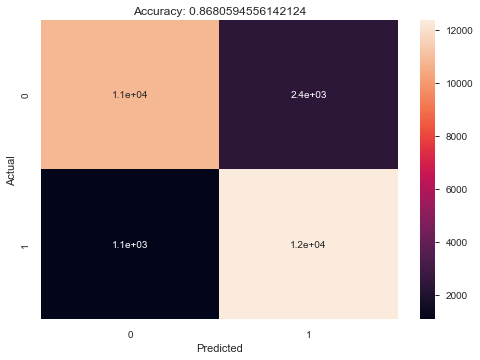

In [25]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.title('Accuracy: '+str(metrics.accuracy_score(y_test, y_pred)))
plt.savefig('Logistic Regression Accuracy.jpg')



In [29]:
def plot_confusion_matrix(cm, normalized = True):
    if normalized:
        cm = cm / cm.sum(axis=1)[:,np.newaxis]
    fig, ax = plt.subplots(figsize=(8,6))
    sn.heatmap(cm, annot=True)
    ax.set_ylim([0,2])
    plt.title("Logistic Regression")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    #plt.savefig('Rinon/confusion_matrix_balanced.jpg')
    plt.show()

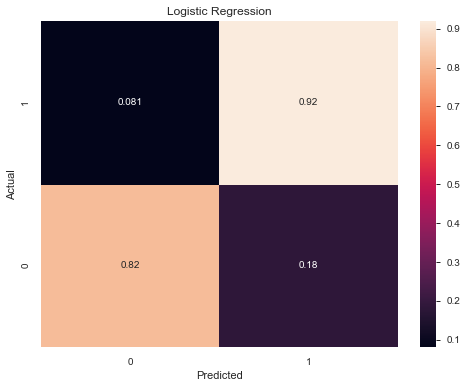

In [30]:
plot_confusion_matrix (confusion_matrix)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.82      0.86     13262
           1       0.84      0.92      0.88     13447

    accuracy                           0.87     26709
   macro avg       0.87      0.87      0.87     26709
weighted avg       0.87      0.87      0.87     26709



# ROC Curve

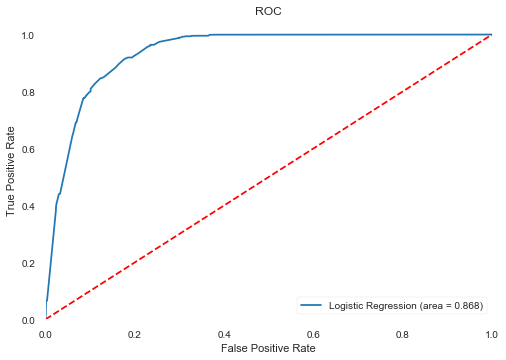

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
